In [ ]:
#Regression Discontinuity Design
#Students that score below 50% on the practice test get extra help
#Estimate the impact of that extra help

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

,PreTest,Treatment,FinalScore,Intercept
0,56.976870,1,56.527228,1
1,65.131254,1,59.295377,1
2,48.578993,0,56.562681,1
3,57.645485,1,60.015050,1
4,48.566996,0,53.360155,1


In [ ]:
df = pd.read_csv('rdd.csv')
df.head()

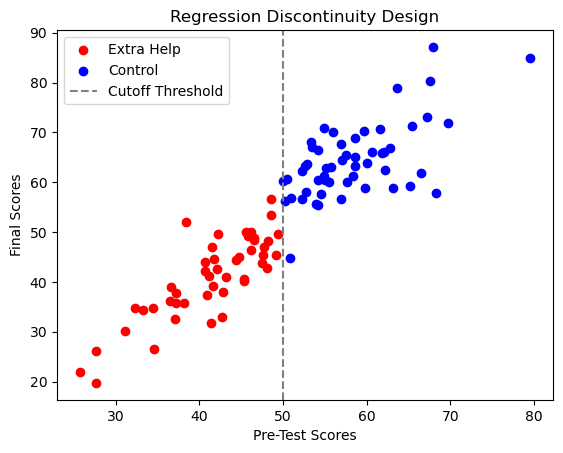

In [22]:
cutoff = 50

plt.scatter(df[df['Treatment'] == 0]['PreTest'], df[df['Treatment'] == 0]['FinalScore'], color='red', label='Extra Help')
plt.scatter(df[df['Treatment'] == 1]['PreTest'], df[df['Treatment'] == 1]['FinalScore'], color='blue', label='Control')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Final Scores')
plt.axvline(x=cutoff, color='grey', linestyle='--', label='Cutoff Threshold')
plt.legend()
plt.title('Regression Discontinuity Design')
plt.show()

In [10]:
below_cutoff = df[df['PreTest'] < cutoff]
above_cutoff = df[df['PreTest'] >= cutoff]

model_below = sm.OLS(below_cutoff['FinalScore'], below_cutoff[['Intercept', 'PreTest']])
results_below = model_below.fit()
print(results_below.summary())

model_above = sm.OLS(above_cutoff['FinalScore'], above_cutoff[['Intercept', 'PreTest']])
results_above = model_above.fit()
print(results_above.summary())

                            OLS Regression Results                            
Dep. Variable:             FinalScore   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     102.9
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           3.31e-13
Time:                        12:45:03   Log-Likelihood:                -137.10
No. Observations:                  47   AIC:                             278.2
Df Residuals:                      45   BIC:                             281.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2266      4.598     -1.137      0.2

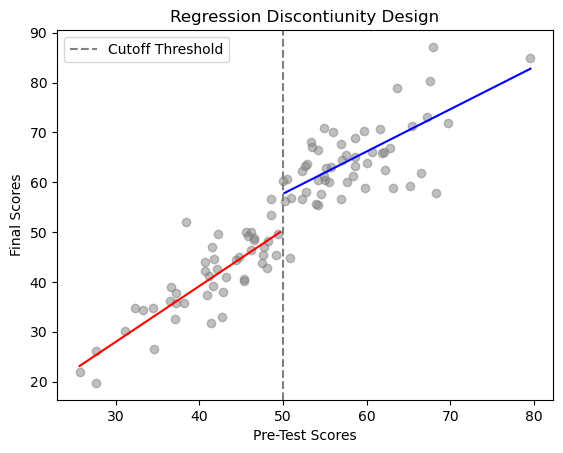

In [40]:
X_plot = np.linspace(df['PreTest'].min(), df['PreTest'].max(), 100)
X_plot_with_intercept = sm.add_constant(X_plot, has_constant='add')

predictions_below = results_below.predict(sm.add_constant(X_plot[X_plot < cutoff], has_constant='add'))
predictions_above = results_above.predict(sm.add_constant(X_plot[X_plot >= cutoff], has_constant='add'))

plt.scatter(df['PreTest'], df['FinalScore'], color='grey', alpha=0.5)
plt.plot(X_plot[X_plot < cutoff], predictions_below, color='red')
plt.plot(X_plot[X_plot >= cutoff], predictions_above, color='blue')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Final Scores')
plt.axvline(x=cutoff, color='grey', linestyle='--', label='Cutoff Threshold')
plt.legend()
plt.title('Regression Discontiunity Design')
plt.show()

In [24]:
#Calculate Treatment Effect 
slope_below = results_below.params['PreTest']
slope_above = results_above.params['PreTest']
treatment_effect = slope_below - slope_above
print("Treatment Effect:", treatment_effect)

Treatment Effect: 0.32452921509626054


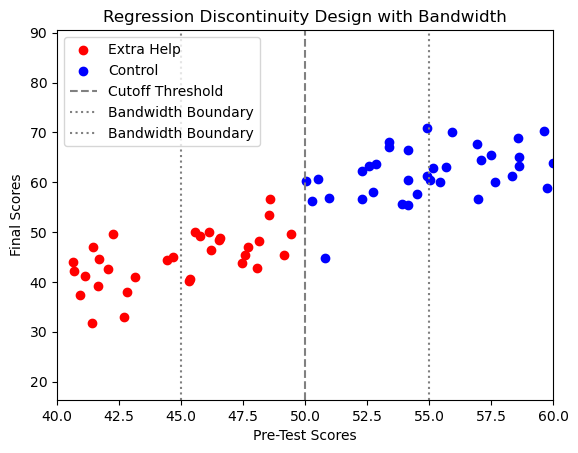

Treatment Effect: -0.4564875374007076


/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [34]:
#With 5 Point Bandwidth

cutoff = 50
bandwidth = 5

plt.scatter(df[df['Treatment'] == 0]['PreTest'], df[df['Treatment'] == 0]['FinalScore'], color='red', label='Extra Help')
plt.scatter(df[df['Treatment'] == 1]['PreTest'], df[df['Treatment'] == 1]['FinalScore'], color='blue', label='Control')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Final Scores')
plt.axvline(x=cutoff, color='grey', linestyle='--', label='Cutoff Threshold')
plt.axvline(x=cutoff - bandwidth, color='grey', linestyle=':', label='Bandwidth Low')
plt.axvline(x=cutoff + bandwidth, color='grey', linestyle=':', label='Bandwidth High')
plt.xlim(cutoff - 2 * bandwidth, cutoff + 2 * bandwidth)  
plt.legend()
plt.title('Regression Discontinuity Design with Bandwidth =+/- 5')
plt.show()

below_cutoff = df[(df['PreTest'] >= cutoff - bandwidth) & (df['PreTest'] < cutoff)]
above_cutoff = df[(df['PreTest'] > cutoff) & (df['PreTest'] <= cutoff + bandwidth)]

model_below = sm.OLS(below_cutoff['FinalScore'], sm.add_constant(below_cutoff['PreTest']))
results_below = model_below.fit()
results_below.summary()

model_above = sm.OLS(above_cutoff['FinalScore'], sm.add_constant(above_cutoff['PreTest']))
results_above = model_above.fit()
results_above.summary()

slope_below = results_below.params['PreTest']
slope_above = results_above.params['PreTest']

treatment_effect = slope_below - slope_above
print("Treatment Effect:", treatment_effect)

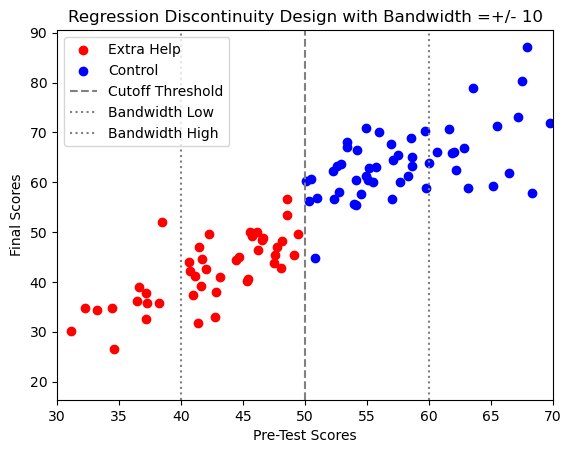

Treatment Effect: 0.27235359143046856


In [42]:
#With 10 Point Bandwidth

cutoff = 50
bandwidth = 10

plt.scatter(df[df['Treatment'] == 0]['PreTest'], df[df['Treatment'] == 0]['FinalScore'], color='red', label='Extra Help')
plt.scatter(df[df['Treatment'] == 1]['PreTest'], df[df['Treatment'] == 1]['FinalScore'], color='blue', label='Control')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Final Scores')
plt.axvline(x=cutoff, color='grey', linestyle='--', label='Cutoff Threshold')
plt.axvline(x=cutoff - bandwidth, color='grey', linestyle=':', label='Bandwidth Low')
plt.axvline(x=cutoff + bandwidth, color='grey', linestyle=':', label='Bandwidth High')
plt.xlim(cutoff - 2 * bandwidth, cutoff + 2 * bandwidth)  
plt.legend()
plt.title('Regression Discontinuity Design with Bandwidth =+/- 10')
plt.show()

below_cutoff = df[(df['PreTest'] >= cutoff - bandwidth) & (df['PreTest'] < cutoff)]
above_cutoff = df[(df['PreTest'] > cutoff) & (df['PreTest'] <= cutoff + bandwidth)]

model_below = sm.OLS(below_cutoff['FinalScore'], sm.add_constant(below_cutoff['PreTest']))
results_below = model_below.fit()
results_below.summary()

model_above = sm.OLS(above_cutoff['FinalScore'], sm.add_constant(above_cutoff['PreTest']))
results_above = model_above.fit()
results_above.summary()

slope_below = results_below.params['PreTest']
slope_above = results_above.params['PreTest']

treatment_effect = slope_below - slope_above
print("Treatment Effect:", treatment_effect)